In [4]:
pip install xgboost

     |██████▍                         | 33.2 MB 3.4 MB/s eta 0:00:39    |█▊                              | 9.2 MB 3.5 MB/s eta 0:00:46     |██                              | 10.2 MB 3.5 MB/s eta 0:00:46ERROR: Exception:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/opt/conda/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/opt/conda/lib/python3.9/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "/opt/conda/lib/python3.9/http/client.py", line 459, in read
    n = self.readinto(b)
  File "/opt/conda/lib/python3.9/http/client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "/opt/conda/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "/opt/conda/lib/python3.9/ssl.py

In [3]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

ModuleNotFoundError: No module named 'xgboost'

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/flyandlure/datasets/master/marketing_mix.csv")
df.head()

,week,tv,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
week,200.0,99.5000,57.879185,0.0,49.750,99.50,149.250,199.0
tv,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


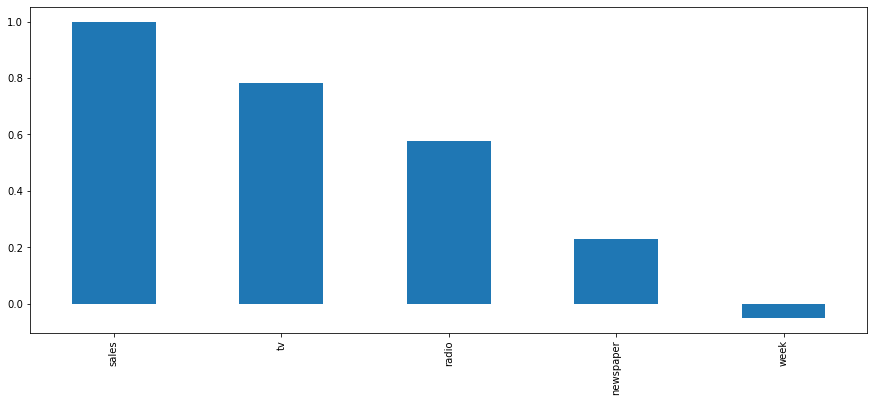

In [6]:
plt.figure(figsize=(15,6))
bars = df.corr()['sales'].sort_values(ascending=False).plot(kind='bar')

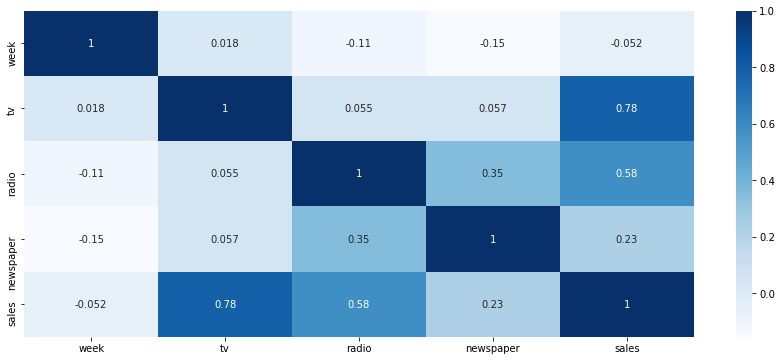

In [7]:
plt.figure(figsize=(15,6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

In [1]:
sns.pairplot(df)
plt.savefig("image3.jpg")


NameError: name 'sns' is not defined

In [10]:
X = df[['week', 'tv', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

In [13]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rmse_cv'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores = cross_val_score(model, 
                             X_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred))),
           'rmse_cv': round(np.mean(np.sqrt(-scores)))
    }

    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* LinearSVR
* KernelRidge
* LinearRegression
* Ridge
* Lars
* TheilSenRegressor
* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


In [14]:
df_models.head(20).sort_values(by='rmse_cv', ascending=True)

,model,run_time,rmse,rmse_cv
0,XGBRegressor,0.01,1,1
1,RandomForestRegressor,0.01,1,1
2,DecisionTreeRegressor,0.0,2,1
15,BayesianRidge,0.0,2,2
14,ARDRegression,0.0,2,2
13,PassiveAggressiveRegressor,0.0,3,2
12,HuberRegressor,0.0,2,2
11,TheilSenRegressor,0.04,2,2
10,Lars,0.0,2,2
8,LinearRegression,0.0,2,2


In [15]:
regressor = XGBRegressor()
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

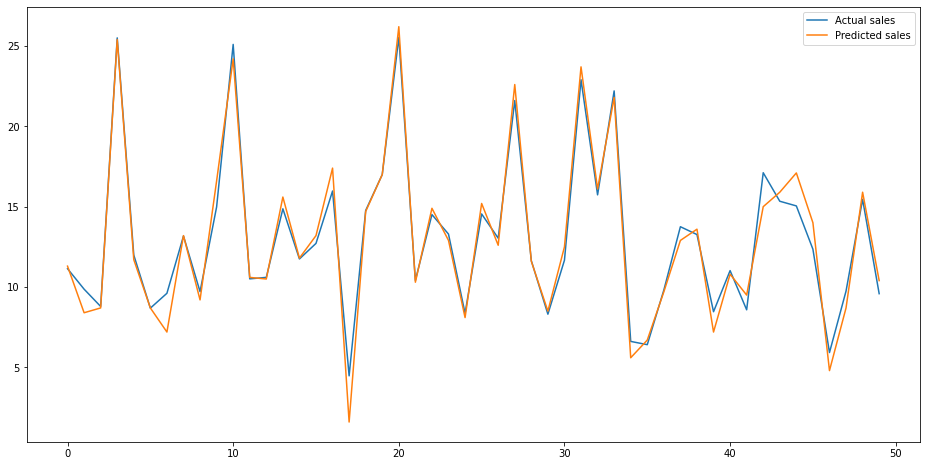

In [16]:
test = pd.DataFrame({'Predicted sales':y_pred, 'Actual sales':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual sales','Predicted sales'])